**rajvi using steph's code**

In [30]:
from mapbox_api import MapboxAPI
import requests
from urllib.request import urlopen
import json

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium


In [64]:
branches = pd.read_csv('../data/clean/branches.csv')
populationDemographics = pd.read_csv('../data/clean/population_demographics.csv')

In [32]:
api = MapboxAPI()

In [60]:
response = api.get_data((41.97557881655979, -87.71361314512697), 15)
#response

/tmp/ipykernel_1310493/2077612089.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
/tmp/ipykernel_1310493/2077612089.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]


ValueError: Length of values (603) does not match length of index (1)

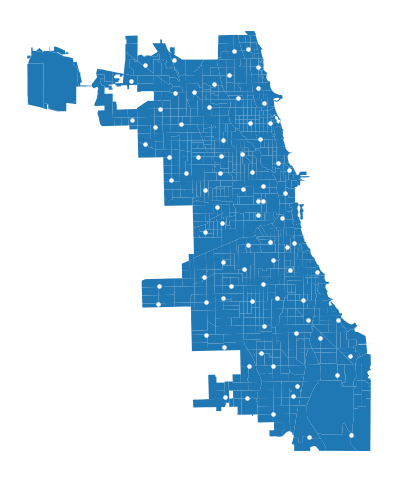

In [92]:
# this line makes a copy of the ageOnly data frame so we can manipulate without affecting our primary dataset
geoOnly = populationDemographics[['geoid','geometry','qualifying name']]
branchLocsOnly=branches[['BRANCH','LOCATION']]

# the following converts the data frame to a geo data frame and plots estimated percent of retired members of each community
geoOnly = gpd.GeoDataFrame(
    geoOnly.loc[:, [c for c in geoOnly.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(geoOnly["geometry"]),
    crs="epsg:4326",
    )

fig, ax = plt.subplots(1, figsize=(6, 6))
base = geoOnly.plot(ax=ax)
ax.axis('off')

branchLocsOnly.crs = 'EPSG:4326'
branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
branchLocsOnly = branchLocsOnly.drop(columns='LOCATION')
#branchLocsOnly.head()

branchLocsOnly = gpd.GeoDataFrame(
    branchLocsOnly, geometry=gpd.points_from_xy(branchLocsOnly.Longitude, branchLocsOnly.Latitude), crs="EPSG:4326")
#print(branchLocsOnly.head())

branchLocsOnly.plot(ax=base, marker='o', color='white', markersize=5);